# Assignment 2 : Perform Exploratory Data Analysis and Data Preprocessing using Python on a Real-World Dataset


# # Problem Statement
### To perform Exploratory Data Analysis (EDA) and apply key data preprocessing techniques including:
1. Handling missing data
2. Detecting and treating outliers
3. Feature scaling
4. Encoding categorical variables
5. using Python and the Titanic dataset from Kaggle


In [8]:
# -------------------------------------------------------------
# Importing All Required Libraries
# -------------------------------------------------------------

import pandas as pd
# Pandas: Essential for data manipulation and analysis
# - Used for reading data files (CSV, Excel, etc.)
# - Provides powerful DataFrame structures for tabular data
# - Useful for filtering, cleaning, grouping, and summarizing data

import numpy as np
# NumPy: Used for numerical operations and handling arrays
# - Supports fast mathematical operations on large datasets
# - Used for creating new calculated columns or handling missing values

import matplotlib.pyplot as plt
# Matplotlib: Core plotting library
# - Allows for creation of line plots, histograms, scatter plots, etc.
# - Often used for basic or custom visualizations
# - Works well with NumPy and pandas

import seaborn as sns
# Seaborn: Built on top of matplotlib for prettier statistical plots
# - Easier to create heatmaps, boxplots, pairplots, bar charts, etc.
# - Works directly with pandas DataFrames
# - Useful for visualizing relationships between variables

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
# sklearn.preprocessing: Tools for data transformation before modeling
# - MinMaxScaler: Scales features to a range (usually 0 to 1)
# - StandardScaler: Standardizes features to have mean = 0 and std dev = 1
# - LabelEncoder: Converts categorical labels (text) into numeric values
#   (e.g., 'male' → 1, 'female' → 0)
# These preprocessing steps are crucial for many machine learning models


In [9]:
# 1. Load Dataset

# pd.read_csv(...) is a Pandas function used to read a CSV file into a DataFrame.
# A DataFrame is a 2D table-like data structure with labeled rows and columns, ideal for data analysis.
# Here, we provide the full file path to the Titanic dataset (adjust the path as needed for your system).
# Once loaded, 'df' will store all the data from the CSV in memory, allowing easy access and manipulation.
df = pd.read_csv("C:\MITADT\ISDL\Lab 1\Titanic.csv")  

# Printing a confirmation message to ensure the dataset was successfully loaded into memory.
print("Dataset Loaded Successfully\n")

# Displaying the first 5 rows of the dataset using head().
# This is often done as an initial sanity check to confirm that the data was loaded correctly.
# It also helps you quickly understand the column names, data format, and sample values.
print("First 5 rows:")
print(df.head())

# Displaying the shape of the dataset.
# df.shape returns a tuple: (number_of_rows, number_of_columns).
# This gives you an idea of the dataset's size and dimensionality, which is important for planning data preprocessing steps.
print("\nShape of dataset:", df.shape)

# Displaying detailed information about the dataset using info().
# This includes:
# - Column names
# - Number of non-null (non-missing) values per column
# - Data types (int, float, object, etc.)
# - Memory usage
# This helps identify potential data cleaning needs, such as handling missing values or converting data types.
print("\nInfo about dataset:")
print(df.info())

Dataset Loaded Successfully

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

In [10]:
# 2. Handling Missing Data

# Checking missing values in each column.
# df.isnull() creates a DataFrame of the same shape where each cell is True if the original value is missing (NaN), else False.
# .sum() is applied column-wise to count the number of missing values in each column.
# This gives a clear picture of where data cleaning is required.
print("\nMissing values in each column:")
print(df.isnull().sum())

# Filling missing values in the 'Age' column with the median age.
# Why median? Median is less affected by extreme outliers compared to mean,
# making it a more robust choice for skewed distributions (common with age data).
# inplace=True ensures the change is applied directly to the original DataFrame without creating a copy.
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling missing values in the 'Embarked' column with the mode (most frequent value).
# Mode is ideal for categorical data because replacing missing values with the most common category
# ensures minimal distortion in distribution patterns.
# mode()[0] is used to access the actual value from the returned Series.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column entirely because it contains a very high percentage of missing values.
# When too much data is missing, imputing values can introduce noise and bias.
# axis=1 indicates we are dropping a column (axis=0 would drop rows).
# inplace=True modifies the DataFrame directly.
df.drop('Cabin', axis=1, inplace=True)

# Checking again for missing values after handling them.
# This verification step ensures that all missing values have been addressed appropriately
# and there are no unintentional omissions in the cleaning process.
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


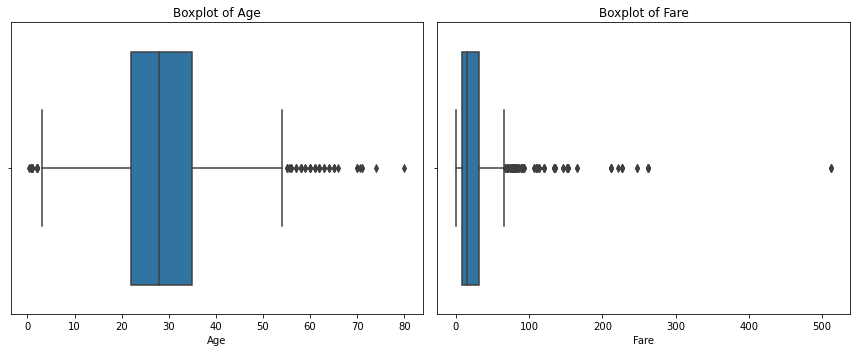

In [11]:


# 3. Detecting and Handling Outliers

# Outliers are extreme values that differ significantly from most data points.
# They can occur due to data entry errors, measurement variability, or natural variations.
# Detecting them is important because they can distort statistical summaries and negatively impact certain ML models.

# Visualizing outliers with boxplots for 'Age' and 'Fare'.

# plt.figure(figsize=(12,5)) creates a new figure with a specified size (width=12 inches, height=5 inches).
# This ensures the subplots have enough space for clear visualization.
plt.figure(figsize=(12,5))

# plt.subplot(1,2,1) means:
#   - 1 row of subplots
#   - 2 columns of subplots
#   - This is the 1st subplot
# Using subplot allows us to place two plots side-by-side for easy comparison.
plt.subplot(1,2,1)

# sns.boxplot(x=df['Age']) creates a boxplot for the 'Age' column.
# In a boxplot:
#   - The box represents the Interquartile Range (IQR: Q1 to Q3)
#   - The horizontal line inside the box is the median
#   - The "whiskers" extend to show the range within 1.5 × IQR from Q1 and Q3
#   - Points outside the whiskers are plotted individually as potential outliers
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')

# Creating the 2nd subplot for 'Fare'
plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')

# plt.tight_layout() automatically adjusts subplot parameters to prevent overlapping text/axes.
plt.tight_layout()

# plt.show() renders all the plots created above.
plt.show()





# Handling Outliers using IQR method (for 'Fare')

# Step 1: Calculate the First Quartile (Q1)
# Q1 is the value below which 25% of the data falls.
# In other words, 25% of the 'Fare' values are less than or equal to Q1.
Q1 = df['Fare'].quantile(0.25)

# Step 2: Calculate the Third Quartile (Q3)
# Q3 is the value below which 75% of the data falls.
# This means 25% of the 'Fare' values are greater than Q3.
Q3 = df['Fare'].quantile(0.75)

# Step 3: Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1
# This range represents the middle 50% of the data and is a measure of statistical dispersion.
# It is robust to outliers and forms the basis for the outlier detection threshold.
IQR = Q3 - Q1




# Define outlier boundaries

# The IQR method for detecting outliers uses the concept of "fences" or thresholds:
# - Lower bound: Q1 - 1.5 × IQR
# - Upper bound: Q3 + 1.5 × IQR
# Any value below the lower bound or above the upper bound is considered a potential outlier.

# Why 1.5 × IQR?
#   This is a common statistical rule of thumb (Tukey's method).
#   1.5 × IQR captures values that are unusually far from the middle 50% of the data,
#   without being too aggressive in labeling points as outliers.
#   For more extreme detection, 3 × IQR is sometimes used.

# Lower bound: Any value less than this is flagged as a low-end outlier.
lower_bound = Q1 - 1.5 * IQR

# Upper bound: Any value greater than this is flagged as a high-end outlier.
upper_bound = Q3 + 1.5 * IQR



# Cap Fare outliers

# Instead of removing outliers (which can lead to loss of valuable data),
# we can "cap" them — also known as winsorization.
# Capping means replacing extreme values with the closest acceptable boundary value.

# np.where(condition, value_if_true, value_if_false) is used here for vectorized conditional replacement:
#   1. If 'Fare' > upper_bound → replace it with upper_bound (high outliers capped).
#   2. Else, if 'Fare' < lower_bound → replace it with lower_bound (low outliers capped).
#   3. Else, keep the original value.

df['Fare'] = np.where(
    df['Fare'] > upper_bound,  # Condition for high outliers
    upper_bound,               # Cap high outliers
    np.where(
        df['Fare'] < lower_bound,  # Condition for low outliers
        lower_bound,               # Cap low outliers
        df['Fare']                  # Keep original value if within bounds
    )
)






In [12]:

# 4. Feature Scaling

# Feature scaling ensures that numerical features have a comparable scale.
# This is important because some machine learning algorithms (e.g., KNN, SVM, Logistic Regression, PCA)
# are sensitive to feature magnitude — large values can dominate smaller ones if not scaled.

# Here, we use StandardScaler from scikit-learn.
# StandardScaler works as follows for each feature:
#     z = (x - mean) / standard_deviation
# - Subtracts the column mean (mean becomes 0)
# - Divides by the column's standard deviation (std dev becomes 1)
# This process is called "standardization" or "z-score normalization".

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit_transform():
#   1. fit() calculates the mean and std deviation for each column in ['Age', 'Fare'].
#   2. transform() applies the standardization formula to each value.
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Why do most standardized values end up between -3 and +3?
# --------------------------------------------------------
# This comes from the Empirical Rule in statistics:
#   - In a normal distribution:
#       ~68% of values lie within ±1 std dev
#       ~95% lie within ±2 std dev
#       ~99.7% lie within ±3 std dev
# So, if the data is roughly normally distributed (bell curve) and has no extreme outliers,
# almost all standardized values will fall between -3 and +3.
#
# IMPORTANT: This is NOT a hard limit!
#   - If data is skewed or has extreme outliers, z-scores can be well outside this range.
#   - Example: Income or house prices (right-skewed data) often have z-scores > +3.
# StandardScaler simply ensures mean=0 and std dev=1; it does NOT cap values to a fixed range.

# Display the first 5 rows of the scaled columns.
print("\nScaled Age and Fare (first 5 rows):")
print(df[['Age', 'Fare']].head())






Scaled Age and Fare (first 5 rows):
        Age      Fare
0 -0.565736 -0.820552
1  0.663861  2.031623
2 -0.258337 -0.787578
3  0.433312  1.419297
4  0.433312 -0.781471


In [13]:
# 5. Encoding Categorical Variables

# Machine learning algorithms generally require numerical input.
# Categorical features (e.g., 'Sex', 'Embarked') must be converted into numbers
# so that models can interpret them.

# Step 1: Identify categorical columns
# df.select_dtypes(include='object') selects all columns with datatype 'object' (usually strings).
# .columns.tolist() converts the column names to a list for easier viewing.
print("\nCategorical Columns:", df.select_dtypes(include='object').columns.tolist())

# Step 2: Encoding Strategy
# -----------------------------------------------------------------
# There are two common types of categorical data:
# 1. Ordinal: Categories have a meaningful order (e.g., Low < Medium < High).
#    - Suitable for Label Encoding (assigning integer codes that preserve order).
# 2. Nominal: Categories have no order (e.g., Male/Female, Port of Embarkation).
#    - Suitable for One-Hot Encoding (creating separate columns for each category).

# In this dataset:
# - 'Sex' is nominal (Male/Female)
# - 'Embarked' is nominal (C/Q/S ports)
# There are no ordinal categorical columns here, so Label Encoding is not needed.

# Step 3: One-Hot Encoding
# pd.get_dummies() creates binary columns (0 or 1) for each category.
# columns=['Sex', 'Embarked'] specifies which columns to encode.
# drop_first=True removes the first category for each column to avoid the "dummy variable trap"
#   (perfect multicollinearity, where one dummy column can be derived from others).
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# After this step:
# - 'Sex' is replaced by a single column, e.g., 'Sex_male' (1 for male, 0 for female)
# - 'Embarked' is replaced by two columns, e.g., 'Embarked_Q' and 'Embarked_S'
#   (the dropped category becomes the reference category)


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Embarked']


In [14]:

# Check final structure

# Printing the first 5 rows of the DataFrame after all preprocessing steps.
# At this stage:
#   - Missing values have been handled
#   - Outliers in 'Fare' have been capped
#   - Numerical features ('Age', 'Fare') have been scaled
#   - Categorical features ('Sex', 'Embarked') have been encoded into numeric columns
# This is the cleaned dataset ready for model training or further analysis.
print("\nData after encoding:")
print(df.head())

# Printing the final shape of the dataset (rows, columns).
# This helps verify:
#   - No rows were accidentally dropped during preprocessing (unless intended)
#   - The number of columns has changed due to encoding (One-Hot Encoding adds new columns)
#   - Dataset size is consistent with expectations before moving to model building.
print("\nFinal dataset shape:", df.shape)


Data after encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.820552         1           0           1  
1          PC 17599  2.031623         0           0           0  
2  STON/O2. 3101282 -0.787578         0           0           1  
3            113